<a href="https://colab.research.google.com/github/sharavana07/ACE_Hack/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Goal to perform the Market Basket ananlysis.

<i>A data mining technique that is used to uncover purchase patterns in any retail setting is known as Market Basket Analysis. Basically, market basket analysis in data mining involves analyzing the combinations of products that are bought together.</i>

In [16]:
!pip install mlxtend


<i>The reason we use mlxtend in Market Basket Analysis is because it provides ready-to-use implementations of association rule mining algorithms, which are the core of Market Basket Analysis.</i>

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [18]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')  # Replace with your actual file name
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.dropna(inplace=True)
df['itemDescription'] = df['itemDescription'].str.strip().str.lower()


In [20]:
# Group by Member_number and Date
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

print(len(basket))
print(basket[:5])  # Preview first 5 transactions


14963
[['whole milk', 'pastry', 'salty snack'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['soda', 'pickled vegetables'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles']]


In [21]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.0025, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
114,0.157923,(whole milk)
69,0.122101,(other vegetables)
84,0.110005,(rolls/buns)
94,0.097106,(soda)
115,0.085879,(yogurt)
85,0.069572,(root vegetables)
106,0.067767,(tropical fruit)
5,0.060683,(bottled water)
89,0.060349,(sausage)
22,0.053131,(citrus fruit)


In [28]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)

# Display top 10 rules
rules[['antecedents','consequents','support','confidence','lift']].head(100)


,antecedents,consequents,support,confidence,lift
8,(curd),(sausage),0.002941,0.087302,1.446615
9,(sausage),(curd),0.002941,0.048726,1.446615
3,(sausage),(bottled beer),0.003342,0.055371,1.222000
2,(bottled beer),(sausage),0.003342,0.073746,1.222000
11,(frankfurter),(other vegetables),0.005146,0.136283,1.116150
10,(other vegetables),(frankfurter),0.005146,0.042146,1.116150
22,(yogurt),(sausage),0.005748,0.066926,1.108986
23,(sausage),(yogurt),0.005748,0.095238,1.108986
4,(rolls/buns),(chocolate),0.002807,0.025516,1.081592
5,(chocolate),(rolls/buns),0.002807,0.118980,1.081592


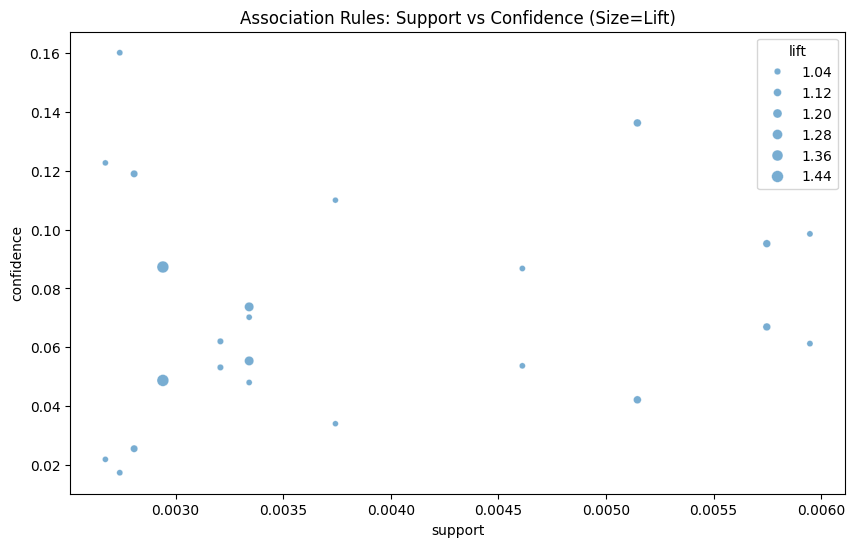

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.6)
plt.title('Association Rules: Support vs Confidence (Size=Lift)')
plt.show()


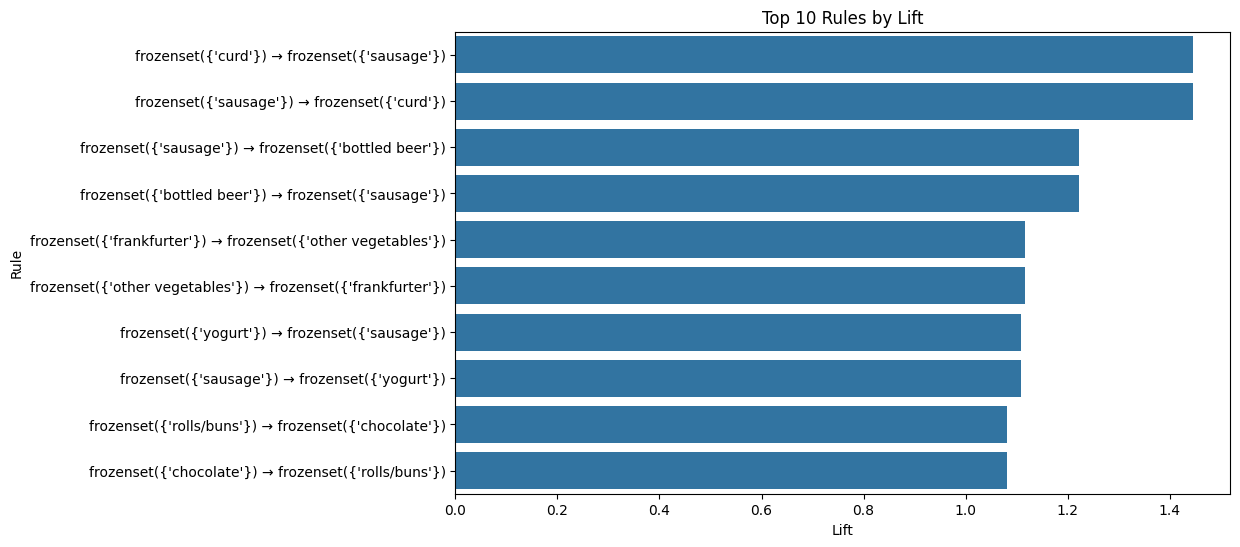

In [30]:
top_rules = rules.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str))
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.show()
